I will use visualizations in matplotlib and apply the following models to present Question 3:
1. Linear regression
2. Logistic regression
3. Ridge regression
4. Lasso regression
5. Principle component analysis(PCA)

Variables explanation:
  1. prate:    participation rate, percent.  The variable prate is the percentage of eligible workers with an active account.
  2. mrate: 401k plan match rate. mrate measures generosity. This variable gives the average amount the firm contributes to each worker’s plan for each 1 dollar of contribution by the worker. --> higher mrate more generous the company is??
  3. totpart: total 401k participants.
  4. totelg: total eligible for 401k plan. 
  
  5. age: age of 401k plan.
  
  6. totemp: total number of firm employees.
  7. sole: = 1 if 401k is firm’s sole plan.
  8. ltotemp: log of totemp.
  
A 401(k) plan is a retirement savings plan sponsored by an employer. It allows employees to save and invest a portion of their paycheck before taxes are taken out. The contributions are invested in a variety of stocks, bonds, and other assets, and the investments grow tax-free until the money is withdrawn during retirement. Many employers offer matching contributions, which means they will also contribute money to an employee's 401(k) account, up to a certain limit.

## Q : Visualizations in matplotlib

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
os.chdir('/Users/chiayiyen')
df3 = pd.read_csv('/Users/chiayiyen/Desktop/0MSBAUTD/2023/6341/csv/401K.csv')
df3

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
0,26.1,0.21,1653,6322,8,8709.0,0,9.072112
1,100.0,1.42,262,262,6,315.0,1,5.752573
2,97.6,0.91,166,170,10,275.0,1,5.616771
3,100.0,0.42,257,257,7,500.0,0,6.214608
4,82.5,0.53,591,716,28,933.0,1,6.838405
...,...,...,...,...,...,...,...,...
1529,85.1,0.33,553,650,24,907.0,0,6.810143
1530,100.0,2.52,142,142,17,197.0,1,5.283204
1531,100.0,2.27,1928,1928,35,2171.0,0,7.682943
1532,100.0,0.58,166,166,8,931.0,1,6.836259


In [3]:
df3.describe()

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
count,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000
mean,87.362907,0.731512,1354.230769,1628.534550,13.181226,3567.321382,0.487614,6.686034
std,16.716537,0.779539,4629.264665,5370.719356,9.171114,11199.875376,0.500010,1.453375
min,3.000000,0.010000,50.000000,51.000000,4.000000,58.000000,0.000000,4.060443
25%,78.025000,0.300000,156.250000,176.000000,7.000000,261.000000,0.000000,5.564520
50%,95.700000,0.460000,276.000000,330.000000,9.000000,588.000000,0.000000,6.376726
75%,100.000000,0.830000,749.500000,890.500000,18.000000,1804.000000,1.000000,7.497762
max,100.000000,4.910000,58811.000000,70429.000000,51.000000,140000.000000,1.000000,11.880250


### Heat Map

<AxesSubplot:>

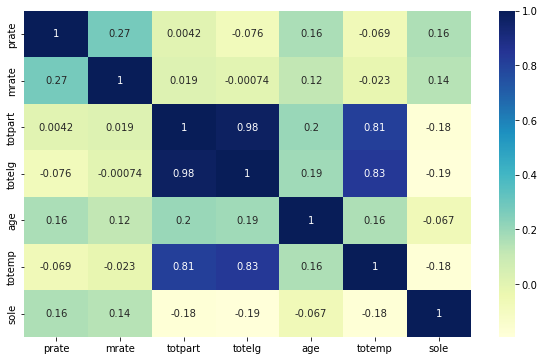

In [4]:
df33 = df3.copy()
df33 = df33.drop(['ltotemp'], axis =1)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df33.corr(), annot = True, cmap = "YlGnBu", ax=ax)

# totleg and totpart are highly correlated(0.98).
# totleg and totemp are highly correlated(0.83).
# totlpart and totemp are highly correlated(0.81).

### ScatterPlot

<AxesSubplot:xlabel='mrate', ylabel='prate'>

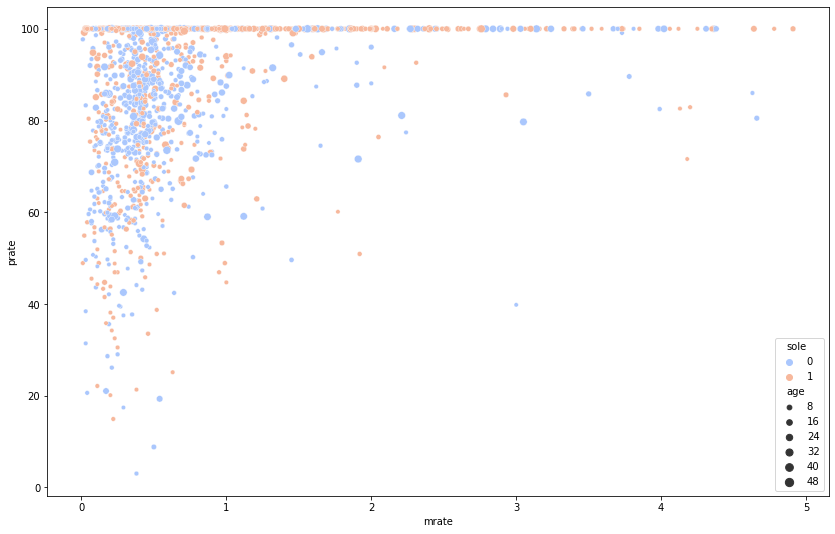

In [13]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x = "mrate", y = "prate", data = df3, hue = "sole", size = "age", palette = "coolwarm")

# It appears that this the value 100 in "prate" is made up of many "sole" companies.

### BoxPlot

Text(0, 0.5, 'mrate')

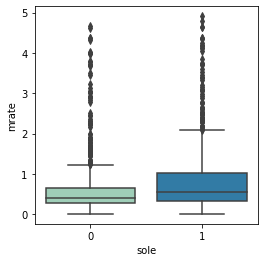

In [26]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(x="sole", y="mrate", data=df3, palette="YlGnBu", ax=ax)
ax.set_ylabel("mrate")

# Sole companies have greater "mrate".

### PairPlot

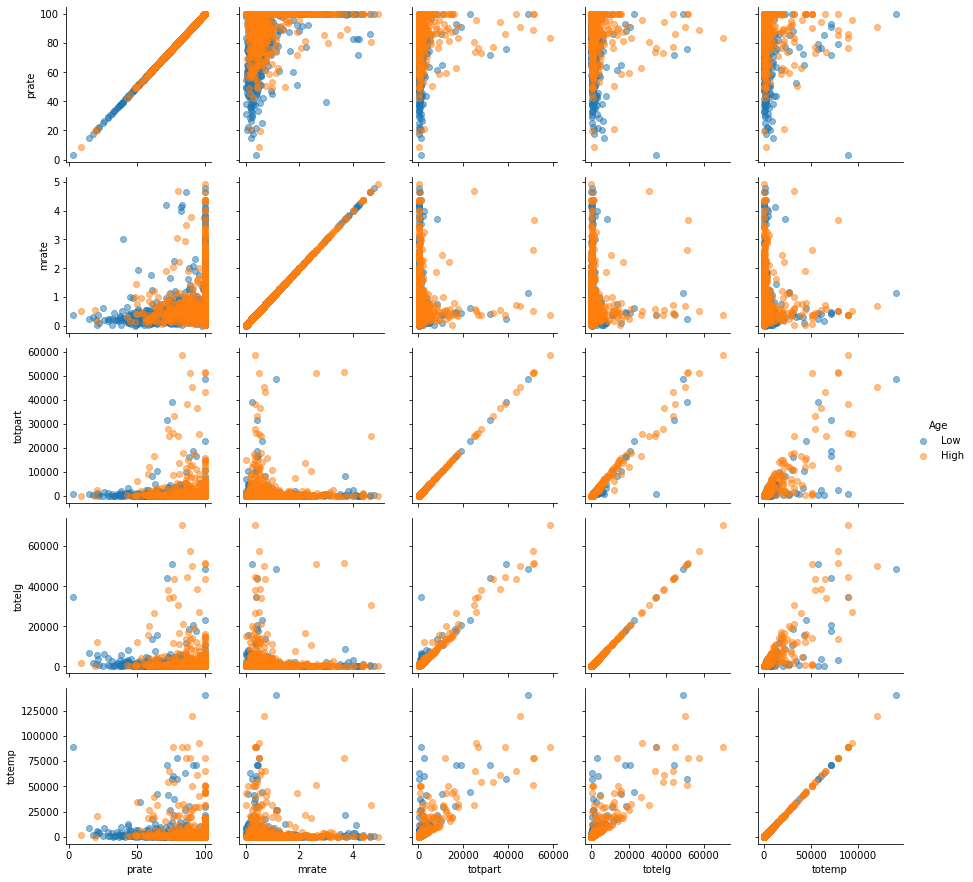

In [12]:
df33= df3.copy()
df33['Age'] = df33['age'].apply(lambda x: 'High' if x > 9 else 'Low')

g = sns.PairGrid(df33, vars=['prate', 'mrate', 'totpart', 'totelg', 'totemp'], 
                 hue='Age')
g.map(plt.scatter, alpha=0.5) 
g.add_legend()

# Orange dots are those of higher "age". (more than the median 9)
# Company with higher "age" tends to have higher "prate".

### Strip Plot

<AxesSubplot:xlabel='age', ylabel='mrate'>

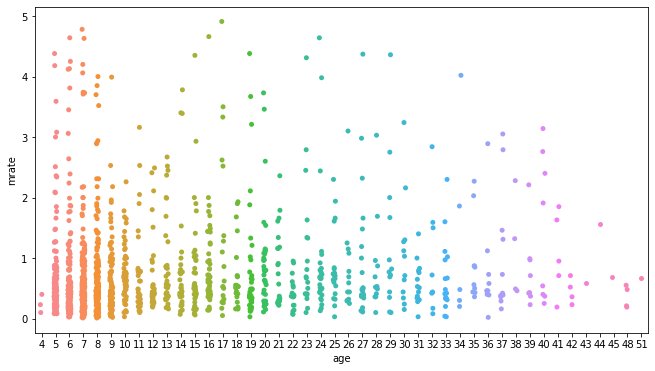

In [15]:
plt.figure(figsize=(11, 6))
sns.stripplot(x="age", y="mrate", data=df33)

# Company with more than 35 "age" appears to have less "mrate".

### 3D Plot

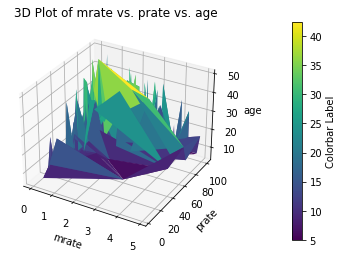

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Use the plot_trisurf function to plot a surface in 3D
surf = ax.plot_trisurf(df33['mrate'], df33['prate'], df33['age'],
                       cmap='viridis', edgecolor='none')

# Add labels and a title
ax.set_xlabel('mrate')
ax.set_ylabel('prate')
ax.set_zlabel('age')
ax.set_title('3D Plot of mrate vs. prate vs. age')

# Add a colorbar and adjust its position
cb = fig.colorbar(surf, pad=0.2)
cb.ax.yaxis.set_label_position('right')
cb.set_label('Colorbar Label')

plt.show()

# high "age" companies tend to have lower "mrate" and higher "prate".

## Q : Models in statsmodels

## Regression

In [30]:
y = df3['prate']
X = df3.copy()
X = X.drop(['prate'], axis =1)
X['const'] = 1.0

In [31]:
linregr1 = sm.OLS(y, X).fit()
print(linregr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  prate   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     76.15
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           8.91e-95
Time:                        20:30:41   Log-Likelihood:                -6266.7
No. Observations:                1534   AIC:                         1.255e+04
Df Residuals:                    1526   BIC:                         1.259e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mrate          4.3227      0.484      8.934      0.0

## Logistic regression

In [5]:
dflr = df3.copy()

In [10]:
# Convert the variable "prate" to binary: its median is 95.7
dflr['prate_binary'] = dflr['prate'].apply(lambda x: 1 if x > 95.7 else 0)

# Address the Singular matrix issue by excluding "totpart", "ltotemp".
mod = smf.logit('prate_binary~mrate+totemp+totelg+age+sole',data=dflr)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.613570
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           prate_binary   No. Observations:                 1534
Model:                          Logit   Df Residuals:                     1528
Method:                           MLE   Df Model:                            5
Date:                Fri, 10 Mar 2023   Pseudo R-squ.:                  0.1148
Time:                        14:34:28   Log-Likelihood:                -941.22
converged:                       True   LL-Null:                       -1063.3
Covariance Type:            nonrobust   LLR p-value:                 1.025e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2537      0.126     -9.952      0.000      -1.501      -1.007
mrate          0.9454      0.

## Q : Models in sklearn

## Ridge Regression

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [16]:
X = df3.drop(['prate'], axis=1)
y = df3['prate']

clf = Ridge(alpha=1.0)
clf.fit(X, y)

Ridge()

In [50]:
clf.coef_

array([ 4.31838267e+00,  5.35162380e-03, -4.76806379e-03,  2.71313711e-01,
        2.64918809e-04,  1.71580893e+00, -3.10467682e+00])

In [51]:
clf.intercept_

100.12160491110643

In [52]:
lm.coef_

array([ 4.32270889e+00,  5.35124706e-03, -4.76772235e-03,  2.71286442e-01,
        2.65037138e-04,  1.71877107e+00, -3.10574309e+00])

In [53]:
lm.intercept_

100.12401644988977

In [54]:
clf.predict(X)

array([56.04271194, 91.97386161, 91.19267184, ..., 97.26750087,
       85.63172101, 85.64736408])

In [55]:
clf.predict(X).mean()

87.3629074315515

In [56]:
lm.predict(X).mean()

87.3629074315515

In [57]:
clf.predict(X).var()

72.25347328180295

In [58]:
lm.predict(X).var()

72.29430593340525

In [59]:
clf = linear_model.RidgeCV(alphas=np.linspace(0.1,500,1000),store_cv_values=True,cv=None)
clf.fit(X,y)

RidgeCV(alphas=array([1.00000000e-01, 6.00400400e-01, 1.10080080e+00, 1.60120120e+00,
       2.10160160e+00, 2.60200200e+00, 3.10240240e+00, 3.60280280e+00,
       4.10320320e+00, 4.60360360e+00, 5.10400400e+00, 5.60440440e+00,
       6.10480480e+00, 6.60520521e+00, 7.10560561e+00, 7.60600601e+00,
       8.10640641e+00, 8.60680681e+00, 9.10720721e+00, 9.60760761e+00,
       1.01080080e+01, 1.06084084e+0...
       4.88490791e+02, 4.88991191e+02, 4.89491592e+02, 4.89991992e+02,
       4.90492392e+02, 4.90992793e+02, 4.91493193e+02, 4.91993594e+02,
       4.92493994e+02, 4.92994394e+02, 4.93494795e+02, 4.93995195e+02,
       4.94495596e+02, 4.94995996e+02, 4.95496396e+02, 4.95996797e+02,
       4.96497197e+02, 4.96997598e+02, 4.97497998e+02, 4.97998398e+02,
       4.98498799e+02, 4.98999199e+02, 4.99499600e+02, 5.00000000e+02]),
        store_cv_values=True)

In [60]:
clf.coef_

array([ 4.32227590e+00,  5.35109080e-03, -4.76810889e-03,  2.71289172e-01,
        2.64440663e-04,  1.71847417e+00, -3.10563653e+00])

In [61]:
clf.intercept_

100.12669844552913

In [62]:
clf.alpha_

0.1

In [63]:
lm.coef_

array([ 4.32270889e+00,  5.35124706e-03, -4.76772235e-03,  2.71286442e-01,
        2.65037138e-04,  1.71877107e+00, -3.10574309e+00])

In [64]:
lm.intercept_

100.12401644988977

In [65]:
clf.predict(X)

array([56.03438974, 91.98117864, 91.19810994, ..., 97.27104711,
       85.63443958, 85.64309524])

In [66]:
clf.predict(X).mean()

87.3629074315515

In [67]:
lm.predict(X).mean()

87.3629074315515

In [68]:
clf.predict(X).var()

72.31011669934878

In [69]:
lm.predict(X).var()

72.29430593340525

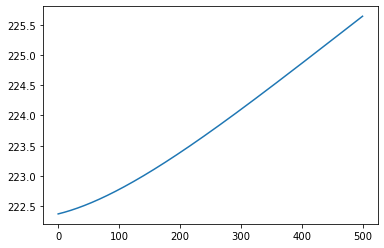

In [70]:
plt.plot(np.linspace(0.1,500,1000),clf.cv_values_.mean(0))

## Lasso Regression

In [25]:
from sklearn import linear_model

In [26]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X, y)

Lasso(alpha=0.1)

In [27]:
clf.coef_

array([ 4.19354494e+00,  5.36734472e-03, -4.78505087e-03,  2.70432198e-01,
        2.61092351e-04,  1.34860547e+00, -3.07862902e+00])

In [28]:
clf.intercept_

100.24946628494949

In [29]:
lm = linear_model.LinearRegression()
lm.fit(X,y)

LinearRegression()

In [30]:
lm.coef_

array([ 4.32270889e+00,  5.35124706e-03, -4.76772235e-03,  2.71286442e-01,
        2.65037138e-04,  1.71877107e+00, -3.10574309e+00])

In [31]:
lm.intercept_

100.12401644988977

In [32]:
lm.predict(X)

array([56.03870683, 91.97910913, 91.19574874, ..., 97.27077524,
       85.63220075, 85.6427667 ])

In [33]:
lm.predict(X).mean()

87.3629074315515

In [34]:
clf = linear_model.LassoCV()
clf.fit(X,y)

LassoCV()

In [35]:
clf.coef_

array([ 0.00000000e+00,  4.23042851e-03, -3.69952819e-03,  0.00000000e+00,
       -3.65793977e-05,  0.00000000e+00, -0.00000000e+00])

In [36]:
clf.intercept_

87.78923091355182

In [37]:
clf.mse_path_

array([[299.20359303, 234.34199554, 301.82657789, 238.65728966,
        326.03011697],
       [299.10092729, 234.33158374, 301.76930828, 238.73480277,
        326.03011697],
       [299.00905864, 234.32476269, 301.7221192 , 238.82803026,
        326.03011697],
       [298.92675432, 234.3209141 , 301.68352098, 238.93318577,
        326.03011697],
       [298.85293043, 234.31951033, 301.65222993, 239.04709336,
        326.03011697],
       [298.78663333, 234.32010197, 301.62714061, 239.1671001 ,
        326.03011697],
       [298.72702344, 234.32230695, 301.60730198, 239.29100058,
        326.03011697],
       [298.67336102, 234.32580119, 301.59189647, 239.41697172,
        326.03011697],
       [298.62499387, 234.33031054, 301.58022206, 239.5435166 ,
        326.03011697],
       [298.58134646, 234.33560367, 301.57167654, 239.669416  ,
        326.03011697],
       [298.54191053, 234.34148608, 301.56574396, 239.79368661,
        326.03011697],
       [298.50623685, 234.34779486, 301.561

In [38]:
clf.mse_path_.mean(1)

array([280.01191462, 279.99334781, 279.98281755, 279.97889843,
       279.9803762 , 279.9862186 , 279.99554998, 280.00762948,
       280.02183201, 280.03763193, 280.05458883, 280.07233535,
       280.09056656, 280.10903088, 280.12752219, 280.14587307,
       280.11977686, 280.0490218 , 279.98931781, 278.96093194,
       276.98550651, 274.55434699, 272.38505427, 270.44750954,
       268.71458403, 266.55965435, 262.1206485 , 258.4684345 ,
       255.48756503, 253.07470441, 251.13039318, 249.59404255,
       248.4119244 , 247.52578346, 246.89117748, 246.46640661,
       246.2152995 , 246.10832732, 246.11703951, 246.22117936,
       246.40146563, 246.64133582, 246.92834408, 247.25058627,
       247.5986598 , 247.96467913, 248.3413664 , 248.72473582,
       249.10928534, 249.49187848, 249.86837114, 250.23829673,
       250.59861179, 250.94864034, 251.28583962, 251.61138299,
       251.92389386, 252.22312019, 252.50905314, 252.78154405,
       253.04072995, 253.28710532, 253.52066011, 253.74

In [39]:
clf.mse_path_.mean(1).argmin()

37

In [40]:
clf.alpha_

977.8237842190564

In [41]:
clf.alphas_[clf.mse_path_.mean(1).argmin()]

977.8237842190564

In [42]:
clf.predict(X)

array([71.07514206, 87.91680429, 87.85250292, ..., 88.73339287,
       87.84330495, 88.82948418])

In [43]:
clf.predict(X).mean()

87.3629074315515

In [44]:
lm.predict(X).mean()

87.3629074315515

In [45]:
clf.predict(X).var()

19.371674686740636

In [46]:
lm.predict(X).var()

72.29430593340525

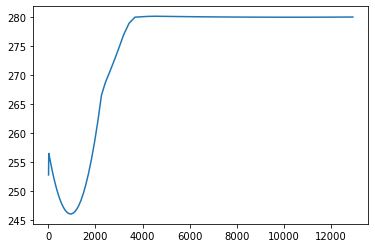

In [47]:
plt.plot(clf.alphas_,clf.mse_path_.mean(1))

## Principle Component Analysis (PCA)

In [5]:
import os
from numpy.linalg import eigh
import sklearn.preprocessing as prep
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer

In [6]:
dfpca = df3.copy()
dfpca = dfpca.drop(['prate','totemp'], axis = 1)

In [7]:
#standardize the data
sc = prep.StandardScaler()
sX = pd.DataFrame(sc.fit_transform(dfpca), columns = dfpca.columns)
# StandardScaler uses the population variance/standard deviation
# calculate the sample standard deviation of the result and scale by dividing with it 
sc.scale_ = np.std(sX, axis = 0, ddof = 1).to_list()
sX = sX/sc.scale_

In [8]:
#create pca object
#not specifying the number of components results in all variables being used
pcaall = PCA()
#pass the feature set 
#fit calculates parameters; transform applies the transformation
pcsall = pcaall.fit_transform(sX)

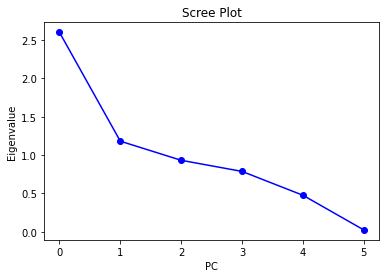

In [10]:
eigenvalues = pcaall.explained_variance_

num_components = len(eigenvalues)
ind = np.arange(num_components)
plt.figure(figsize=(6, 4))
plt.plot(ind, eigenvalues, 'bo-')
plt.xlabel('PC')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.xticks(ind)
plt.show()

In [8]:
print('\nEigen Values of Correlation Matrix')
print(pcaall.explained_variance_)


Eigen Values of Correlation Matrix
[2.60198013 1.18108897 0.93156834 0.78651294 0.47555792 0.02329169]


In [9]:
expldvarpcaall = pcaall.explained_variance_ratio_
expldvarpcaall

array([0.43366336, 0.19684816, 0.15526139, 0.13108549, 0.07925965,
       0.00388195])

In [10]:
expldvarsumall = np.cumsum(expldvarpcaall)
print('\nCumulative sum of the explained variance')
print(expldvarsumall)

# PC1 & PC2 & PC3        satisfy the threshold 70%.
# PC1 & PC2 & PC3 & PC4  satisfy the threshold 90%.


Cumulative sum of the explained variance
[0.43366336 0.63051152 0.78577291 0.9168584  0.99611805 1.        ]


In [11]:
pcsalldf = pd.DataFrame(pcsall, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
print(pcsalldf) 

           PC1       PC2       PC3       PC4       PC5       PC6
0     1.490075 -1.360359  0.043455  0.483862 -0.772858  0.526073
1    -1.026482  0.859511  0.999998  0.428611 -0.008520  0.002814
2    -0.991549  0.572397  0.722796 -0.246411  0.098954  0.004071
3    -0.317112 -1.050600 -0.154613  0.562489  0.496584 -0.019358
4    -0.077519  0.923218 -0.665687 -1.494088 -0.510909  0.004084
...        ...       ...       ...       ...       ...       ...
1529  0.324744 -0.409531 -1.474726 -0.428552  0.216020 -0.006921
1530 -1.013742  2.443535  0.053202  0.723373  0.194944  0.038149
1531  1.092814  1.886304 -2.392750  0.671794 -0.256106 -0.022520
1532 -0.616804  0.034958  0.850972 -0.314642 -0.593674 -0.022657
1533  1.105934 -0.359856 -1.368969 -0.255702 -0.348033 -0.068828

[1534 rows x 6 columns]


### Run linear regression using all PCs.

In [17]:
# Join dfpca with pcsalldf, remove dependent variable
allpclr = pd.concat([dfpca, pcsalldf], axis = 1)

In [18]:
linregr6 = sm.OLS(y, allpclr).fit()
print(linregr6.summary())

# In this regression, we get a R-square = 0.251 and Adj. R-square = 0.248. 
# The variables that were statistically significant at the 0.05 level were:
# mrate, totpart, totelg, age, sole, ltotemp, PC1, PC3, PC4, PC5, PC6(0.000), 
# PC2(0.002)

                            OLS Regression Results                            
Dep. Variable:                  prate   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     85.34
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.44e-92
Time:                        17:50:16   Log-Likelihood:                -6274.7
No. Observations:                1534   AIC:                         1.256e+04
Df Residuals:                    1527   BIC:                         1.260e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mrate          4.1168      0.184     22.315      0.0

### Run regressions using the number of principal components based on Kaiser’s Rule and “explained variance” thresholds of 70% (using PC1, PC2 and PC3)

In [19]:
pc2lr = allpclr.copy()

In [20]:
pc2lr = pc2lr.drop(['PC4','PC5','PC6'], axis = 1)

In [21]:
lrpc2 = sm.OLS(y, pc2lr).fit()
print(lrpc2.summary())

# With only PC1, PC2 and PC3, this regression get the SAME R-square and Adj. R-square 
# as the previous regression. 
# The variables that were statistically significant at the 0.05 level were:
# mrate, totpart, totelg, age, sole, ltotemp, PC1, PC2, PC3

                            OLS Regression Results                            
Dep. Variable:                  prate   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     85.34
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.44e-92
Time:                        17:52:31   Log-Likelihood:                -6274.7
No. Observations:                1534   AIC:                         1.256e+04
Df Residuals:                    1527   BIC:                         1.260e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mrate         12.9776      0.448     28.957      0.0